In [1]:
import numpy as np
import pandas as pd

# the machine learning algorithm
from sklearn.ensemble import RandomForestClassifier

#test train split
#cross validation help to increase the effectivness of the model by splitting the sample data into 
from sklearn.cross_validation import train_test_split

# just to switch off pandas warning
pd.options.mode.chained_assignment=None
# importing seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#used to write our model to file
from sklearn.externals import joblib

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#read the csv file
data=pd.read_csv("titanic_train.csv")
data

,Unnamed: 0,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,998,999,3rd,1,"McCarthy, Miss Katie",NaN,NaN,NaN,NaN,NaN,NaN,female
1,179,180,1st,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male
2,556,557,2nd,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male
3,174,175,1st,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male
4,1232,1233,3rd,0,"Strilic, Mr Ivan",NaN,NaN,NaN,NaN,NaN,NaN,male
5,815,816,3rd,1,"Georges, Mrs Shahini Weappi",NaN,Cherbourg,"Youngstown, OH",NaN,NaN,NaN,female
6,1171,1172,3rd,0,"Sage, Miss Constance",NaN,NaN,NaN,NaN,NaN,NaN,female
7,1219,1220,3rd,1,"Smyth, Miss Julia",NaN,NaN,NaN,NaN,NaN,NaN,female
8,730,731,3rd,0,"Connors, Mr Patrick",NaN,Queenstown,NaN,NaN,NaN,(171),male
9,117,118,1st,1,"Goldenberg, Mr Samuel L.",49.0,Cherbourg,"Paris, France / New York, NY",NaN,NaN,5,male


In [3]:
#displaying the column names
data.columns

Index(['Unnamed: 0', 'row.names', 'pclass', 'survived', 'name', 'age',
       'embarked', 'home.dest', 'room', 'ticket', 'boat', 'sex'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
Unnamed: 0    919 non-null int64
row.names     919 non-null int64
pclass        919 non-null object
survived      919 non-null int64
name          919 non-null object
age           439 non-null float64
embarked      571 non-null object
home.dest     531 non-null object
room          48 non-null object
ticket        46 non-null object
boat          233 non-null object
sex           919 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 86.2+ KB


In [5]:
# The age attribute has NaN values. so to replace the empty fields with the median age
median_age=data["age"].median()
print("Median age is {}".format(median_age))

Median age is 29.0


In [6]:
# Displaying the age after replacing the NaN values with the median value
data["age"].fillna(median_age, inplace=True)
data["age"].head()

0    29.0
1    65.0
2    59.0
3    46.0
4    29.0
Name: age, dtype: float64

In [7]:
# Analysis of data
# As in the movie "Titanic", we saw that the rich were more likely to survive .
# Also, the first preference was given to women and children.
# Based on this,we can say 3 things mattered the most likely to surviving the Titanic.
# how rich you were,your age and your sex
data_inputs=data[["pclass","age","sex"]]
data_inputs.head()

,pclass,age,sex
0,3rd,29.0,female
1,1st,65.0,male
2,2nd,59.0,male
3,1st,46.0,male
4,3rd,29.0,male


In [8]:
data_inputs.describe()

,age
count,919.000000
mean,29.985763
std,10.274615
min,0.333300
25%,29.000000
50%,29.000000
75%,29.000000
max,71.000000


In [9]:
#the expected output is the survived field
expected_output=data[["survived"]]
expected_output.head()

,survived
0,1
1,0
2,0
3,0
4,0


In [10]:
# the passenger class is a string ,so we are changing it in integers
data_inputs["pclass"].replace("3rd",3,inplace=True)
data_inputs["pclass"].replace("2nd",2,inplace=True)
data_inputs["pclass"].replace("1st",1,inplace=True)
data_inputs.head()

,pclass,age,sex
0,3,29.0,female
1,1,65.0,male
2,2,59.0,male
3,1,46.0,male
4,3,29.0,male


In [11]:
# Assigning 0 for female and 1 for male .
data_inputs["sex"]=np.where(data_inputs["sex"]=="female",0,1)
data_inputs.head()

,pclass,age,sex
0,3,29.0,0
1,1,65.0,1
2,2,59.0,1
3,1,46.0,1
4,3,29.0,1


In [12]:
# Create test train split


inputs_train, inputs_test, expected_output_train, expected_output_test = train_test_split(data_inputs,
                                expected_output,test_size=0.33,random_state=42)
print(inputs_train.head())
print(expected_output_train.head())

     pclass   age  sex
618       3  19.0    1
169       3  29.0    1
830       1  54.0    1
140       3  29.0    1
173       2  28.0    1
     survived
618         0
169         0
830         1
140         0
173         0


In [13]:
#create the random forest instance , and train it with training data
rf=RandomForestClassifier(n_estimators=100)

In [14]:
rf.fit(inputs_train,expected_output_train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
# Calculate the accuracy to our model
accuracy=rf.score(inputs_test,expected_output_test)
print("Accuracy = {}%".format(accuracy*100))

Accuracy = 79.60526315789474%


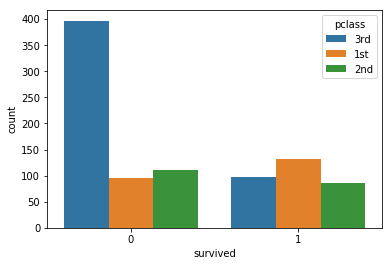

In [16]:
# Plotting a graph number of people of each class survived
sns.countplot(data=data,x='survived',hue='pclass')
#here 0 is passengers that dosent survived nd 1 is passenger that survived

In [17]:
# the passenger class is a string ,so we are changing it in integers
#we need to do this as the machine learning algorithm don't take string values.
data["pclass"].replace("3rd",3,inplace=True)
data["pclass"].replace("2nd",2,inplace=True)
data["pclass"].replace("1st",1,inplace=True)
data.head(10)

,Unnamed: 0,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,998,999,3,1,"McCarthy, Miss Katie",29.0,NaN,NaN,NaN,NaN,NaN,female
1,179,180,1,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male
2,556,557,2,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male
3,174,175,1,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male
4,1232,1233,3,0,"Strilic, Mr Ivan",29.0,NaN,NaN,NaN,NaN,NaN,male
5,815,816,3,1,"Georges, Mrs Shahini Weappi",29.0,Cherbourg,"Youngstown, OH",NaN,NaN,NaN,female
6,1171,1172,3,0,"Sage, Miss Constance",29.0,NaN,NaN,NaN,NaN,NaN,female
7,1219,1220,3,1,"Smyth, Miss Julia",29.0,NaN,NaN,NaN,NaN,NaN,female
8,730,731,3,0,"Connors, Mr Patrick",29.0,Queenstown,NaN,NaN,NaN,(171),male
9,117,118,1,1,"Goldenberg, Mr Samuel L.",49.0,Cherbourg,"Paris, France / New York, NY",NaN,NaN,5,male


In [18]:
data.corr()

,Unnamed: 0,row.names,pclass,survived,age
Unnamed: 0,1.000000,1.000000,0.899601,-0.335450,-0.227925
row.names,1.000000,1.000000,0.899601,-0.335450,-0.227925
pclass,0.899601,0.899601,1.000000,-0.345283,-0.321135
survived,-0.335450,-0.335450,-0.345283,1.000000,-0.045752
age,-0.227925,-0.227925,-0.321135,-0.045752,1.000000


In [19]:
#sex a categorical value having labels inside  it so it must be first converted to numerical value 
data["sex"]=np.where(data["sex"]=="female",0,1)
data.head()

,Unnamed: 0,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,998,999,3,1,"McCarthy, Miss Katie",29.0,NaN,NaN,NaN,NaN,NaN,0
1,179,180,1,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),1
2,556,557,2,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,1
3,174,175,1,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),1
4,1232,1233,3,0,"Strilic, Mr Ivan",29.0,NaN,NaN,NaN,NaN,NaN,1


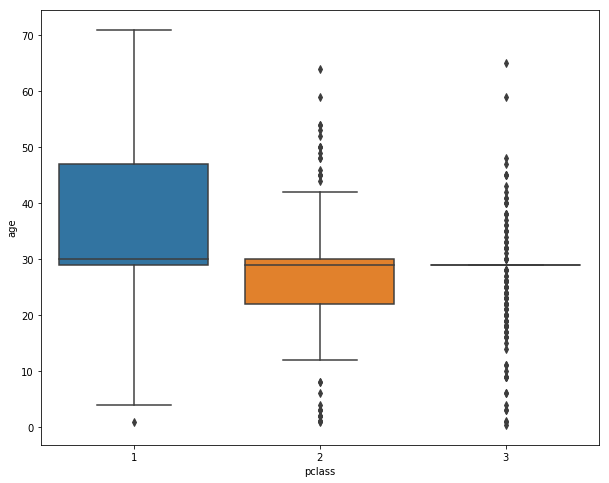

In [20]:
# Box plot allows us to look at the ages according to the class of people on board.
plt.figure(figsize=(10,8))
sns.boxplot(x='pclass',y='age',data=data)

__TITANIC DATA ANALYTICS USING LOGISTIC REGRESSION__

In [21]:
data_rev=data.reindex_axis(['survived','pclass','sex','age'],axis=1)
data_rev

,survived,pclass,sex,age
0,1,3,0,29.0
1,0,1,1,65.0
2,0,2,1,59.0
3,0,1,1,46.0
4,0,3,1,29.0
5,1,3,0,29.0
6,0,3,0,29.0
7,1,3,0,29.0
8,0,3,1,29.0
9,1,1,1,49.0


In [22]:
x=data_rev.drop('survived',axis=1)
y=data_rev['survived']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg=LogisticRegression()

In [26]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
predictions=lg.predict(x_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.97      0.85       172
          1       0.90      0.51      0.65       104

avg / total       0.82      0.79      0.78       276



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test,predictions)

array([[166,   6],
       [ 51,  53]], dtype=int64)

In [32]:
accuracy=lg.score(x_test,y_test)
print("Accuracy = {}%".format(accuracy*100))

Accuracy = 79.34782608695652%
